In [ ]:
# Name: Alam Ali, Net ID: aa8007, DL Project
# Project code for ACOPF solver

from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from keras.constraints import max_norm

# load dataset

system = "14"

dataframeX = read_csv("/content/drive/MyDrive/14result_overall_in.csv", delimiter=',', header=None)
X = dataframeX.values[0:]
dataframeY = read_csv("/content/drive/MyDrive/14result_overall_out.csv", delimiter=',', header=None)
Y = dataframeY.values

# split into input (X) and output (Y) variables
print (len(X))
print (X.shape)

print (len(Y))
print (Y.shape)

nsamples = X.shape[0]
npredictors = X.shape[1]
noutvars = Y.shape[1]
print (npredictors)
print (noutvars)
#print (X[1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
model = Sequential() # do this every time to reset the model!
model.add(Dense(npredictors, input_dim=npredictors, kernel_initializer='normal', activation='tanh'))
model.add(Dense(10000, activation='relu'))
model.add(Dense(noutvars, activation='linear'))#,kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))

model.summary()
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(loss='mse', optimizer=opt, metrics=['mse','mae'])

In [ ]:
history = model.fit(X, Y, epochs=50, batch_size=64,  verbose=1, validation_split=0.01)

In [ ]:
model.save(system+'busNN.h5')

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


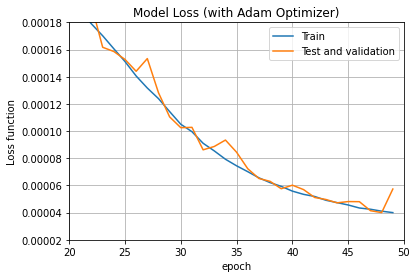

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (with Adam Optimizer)')
plt.xlim([20,50]);
plt.ylim([0.00002,0.00018]);
plt.ylabel('Loss function')
plt.xlabel('epoch')
plt.legend(['Train', 'Test and validation'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
model = Sequential() # do this every time to reset the model!
model.add(Dense(npredictors, input_dim=npredictors, kernel_initializer='normal', activation='tanh'))
model.add(Dense(10000, activation='relu'))
model.add(Dense(noutvars, activation='linear'))#,kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))

model.summary()
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
model.compile(loss='mse', optimizer=opt, metrics=['mse','mae'])

In [ ]:
history = model.fit(X, Y, epochs=50, batch_size=64,  verbose=1, validation_split=0.01)

In [ ]:
model.save(system+'busNN.h5')

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


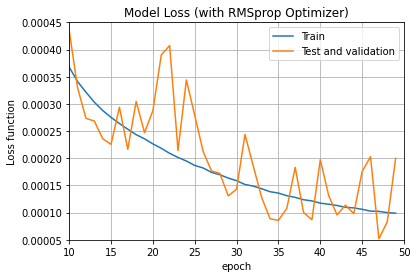

In [ ]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (with RMSprop Optimizer)')
plt.xlim([10,50]);
plt.ylim([0.00005,0.00045]);
plt.ylabel('Loss function')
plt.xlabel('epoch')
plt.legend(['Train', 'Test and validation'], loc='upper right')
plt.grid()
plt.show()